In [9]:
import json
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder

In [11]:
samples = parser.samples
s = set()
labels = []
data = []
counter = 0
for i in samples:
    for gene in samples[i]:
        if(gene in s):
            continue
        print(gene)
        toAdd = parser.getNumOfDonorsWithBuckets(gene)
        if(toAdd == None):
            continue
        else:
            s.add(gene)
            labels.append(gene)
            data.append(np.histogram(toAdd)[0])

XRCC6
XRCC5
PRKDC
LIG4
XRCC4
DCLRE1C
NHEJ1
MRE11
RAD50
NBN
RBBP8
ERCC4
ERCC1
LIG1
POLL
POLB
PARP1
LIG3
XRCC1
RAD51
RAD51B
RAD51D
DMC1
XRCC2
XRCC3
RAD52
RAD54L
RAD54B
BRCA1
SHFM1
HTTP Error 400: Bad Request
https://rest.ensembl.org/lookup/symbol/homo_sapiens/SHFM1?content-type=application/json;expand=1
symb got fricked
MUS81
EME1
EME2
GIYD1
HTTP Error 400: Bad Request
https://rest.ensembl.org/lookup/symbol/homo_sapiens/GIYD1?content-type=application/json;expand=1
symb got fricked
GIYD2
HTTP Error 400: Bad Request
https://rest.ensembl.org/lookup/symbol/homo_sapiens/GIYD2?content-type=application/json;expand=1
symb got fricked
GEN1
UNG
SMUG1
MBD4
TDG
OGG1
MUTYH
NTHL1
MPG
NEIL1
NEIL2
NEIL3
APEX1
APEX2
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/APEX2?content-type=application/json;expand=1
symb got fricked
PNKP
APLF
PARP2
PARP3
MGMT
ALKBH2
ALKBH3
TDP1
TDP2
MSH2
MSH3
MSH6
MLH1
PMS2
MSH4
MSH5
MLH3
PMS1
PMS2L3
HTTP Error 400: Bad Request
http

In [12]:
print(data)

[array([13,  0,  0,  0,  0,  0,  0,  0,  0,  1]), array([8, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([16,  0,  0,  0,  0,  5,  0,  0,  0,  2]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), array([12,  0,  4,  0,  0,  0,  0,  1,  0,  2]), array([8, 0, 0, 0, 0, 1, 0, 0, 0, 1]), array([13,  0,  0,  0,  0,  3,  0,  0,  0,  1]), array([0, 0, 0, 0, 0, 8, 0, 0, 0, 0]), array([3, 0, 0, 0, 0, 1, 0, 0, 0, 1]), array([12,  0,  0,  0,  0,  1,  0,  0,  0,  1]), array([37,  6,  3,  3,  0,  0,  0,  0,  0,  1]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), array([18,  0,  0,  0,  0,  2,  0,  0,  0,  1]), array([5, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0]), array([14,  0,  0,  3,  0,  0,  0,  0,  0,  1]), array([14,  0,  0,  0,  0,  1,  0,  0,  0,  1]), array([5, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([9, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0]), array([95, 19,  0,  7,  0,  2,  1,  0,  0,  1]), array([3, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([12,  0,  0,  0,  0,  0,  0,  0,  0

In [13]:
maxlen = 0
for arr in data:
    if len(arr) > maxlen:
        maxlen = len(arr)

In [14]:
print(maxlen)

10


In [18]:
data = np.array(data)

In [78]:
def autolabel(rects, bottom):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in range(0, len(rects)):
        rect = rects[i]
        height = rect.get_height()
        if height == 0:
            continue
        if len(bottom) == 0:
            val = 0
        else:
            val = bottom[i]
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height + val),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center', color="black", fontsize=6, fontweight="bold", zorder=10,)

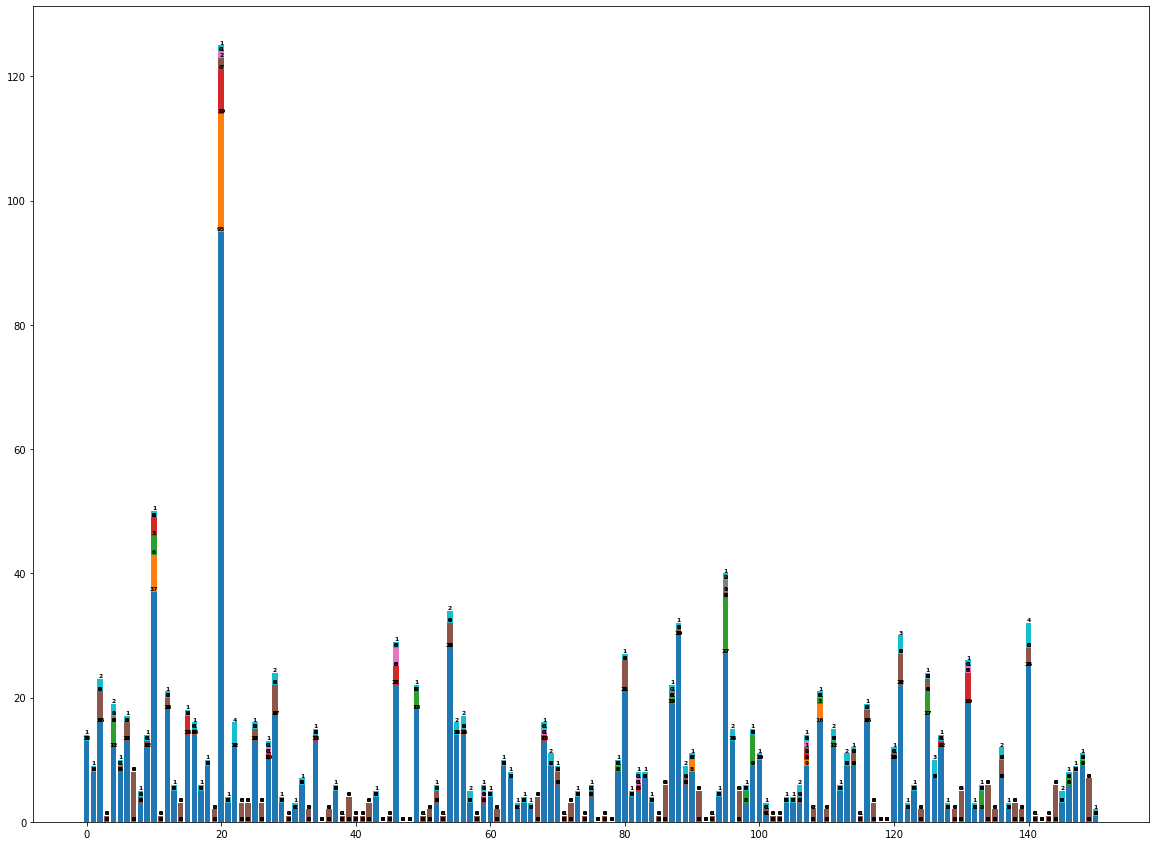

In [79]:
fig, ax = plt.subplots(figsize=(20, 15))
x = np.arange(len(labels))
bottom = []
forlegend = []
labelsForLegend = []
for i in range(0, maxlen):
    forPlot = []
    for j in data:
        try:
            forPlot.append(j[i])
        except:
            forPlot.append(0)
    if len(bottom) == 0:
        rects = ax.bar(x, forPlot, label=f"{i+1}")
        autolabel(rects, bottom)
        bottom = np.array(forPlot)
    else:
        rects = ax.bar(x, forPlot, label=f"{i+1}", bottom=bottom)
        autolabel(rects, bottom)
        bottom += np.array(forPlot)
    forlegend.append(rects[0])
    labelsForLegend.append(f"{i+1}")

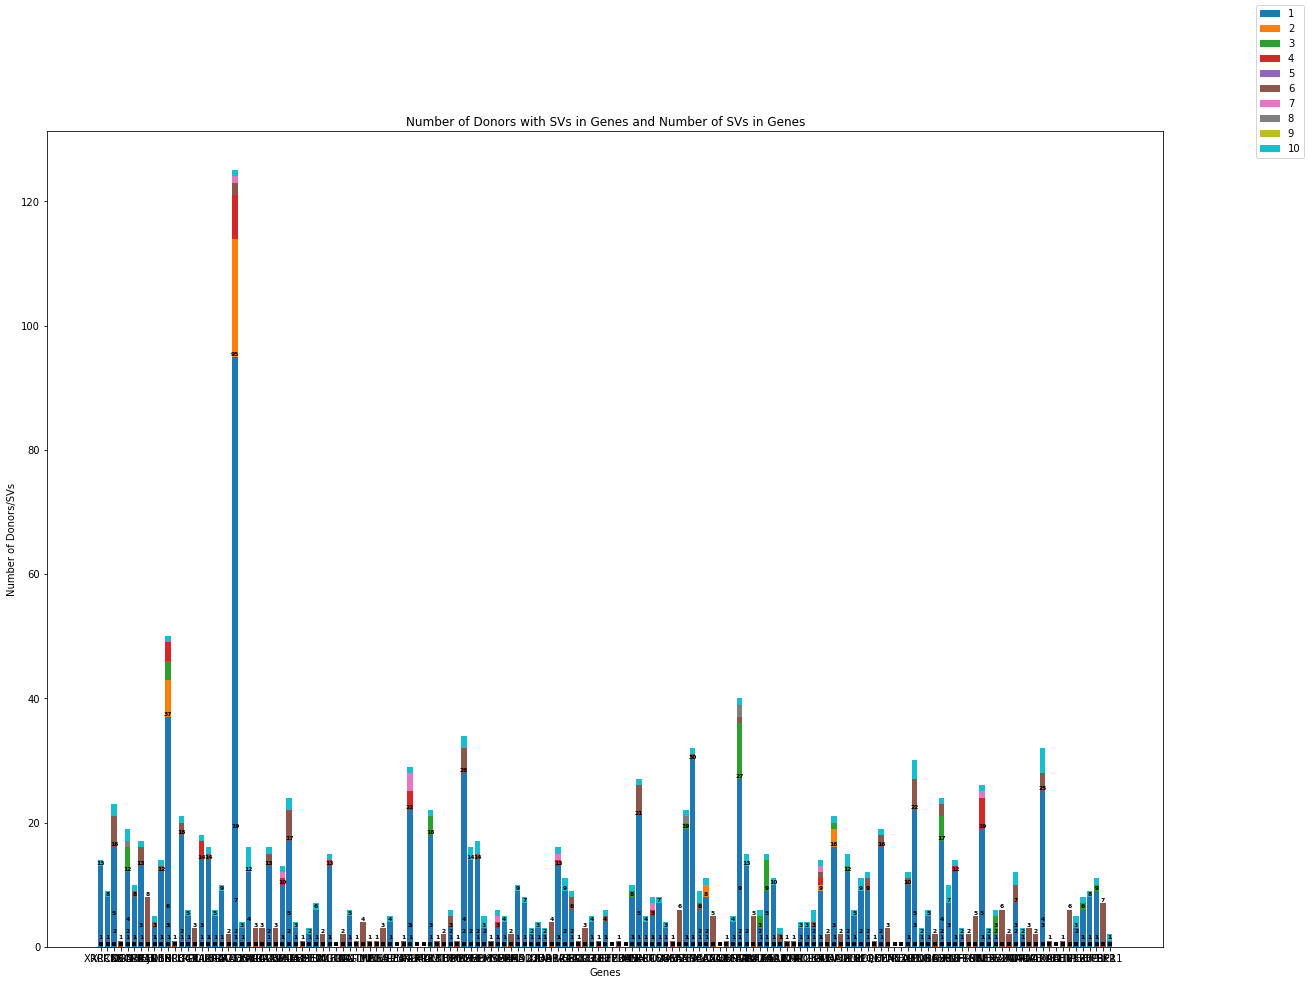

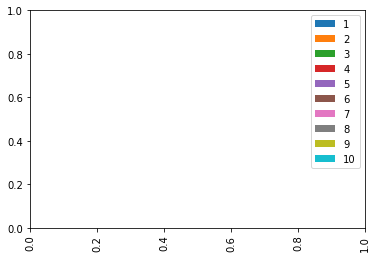

In [70]:
ax.set_title('Number of Donors with SVs in Genes and Number of SVs in Genes')
ax.set_ylabel('Number of Donors/SVs')
ax.set_xlabel('Genes')
ax.set_title('Number of Donors with SVs in Genes and Number of SVs in Genes')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
fig.legend(forlegend, labelsForLegend)

In [69]:
test = parser.getNumOfDonorsWithBuckets('RAD51B')
print(test)
np.histogram()[0]

[7, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


TypeError: _histogram_dispatcher() missing 1 required positional argument: 'a'